## Cleaning Data for question 2 (b)

## PART A

In [1]:
#importing necessary libraries for part (b)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

##### uploading the merged data set of year 2006 and 2007

In [2]:
merged_dataset=pd.read_csv(r"C:\Users\user\Desktop\progdata\mergedata2006n2007.csv")

##### reading the plane data set

In [3]:
dataset_planedata_ = pd.read_csv(r"C:\Users\user\Downloads\Programming\plane-data.csv")
dataset_planedata_.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### removing the duplicated rows

In [4]:
dataset_planedata_.drop_duplicates(inplace=True)
dataset_planedata_.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### renaming the column "tailnum" to "TailNum" to make a left merge

In [5]:
dataset_planedata_ = dataset_planedata_.rename(columns={"tailnum": "TailNum"})

In [6]:
dataset_planedata_.columns

Index(['TailNum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

##### combining the plane data set and the merged data set from 2006 and 2007 together

In [7]:
merged_planedata_ = pd.merge (merged_dataset, dataset_planedata_ , on="TailNum", how="left")
merged_planedata_.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0,0,Corporation,AIRBUS,10/04/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Fan,NaN
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0,0,Corporation,AIRBUS INDUSTRIE,01/25/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0,0,Corporation,BOEING,09/28/2005,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1990.0


##### saving the data merged with plane data set

In [8]:
merged_planedata_.to_csv(r"C:\Users\user\Desktop\progdata\merged_planedata_.csv",index=False)

In [9]:
merged_planedata_.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

##### changing 'year' to 'yearofmanufacture'

In [10]:
merged_planedata_ = merged_planedata_.rename(columns={"year": "YearOfManufacture"})

In [11]:
merged_planedata_.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
type                  object
manufacturer          object
issue_date            object
model                 object
status                object
aircraft_type 

In [12]:
# Convert 'YearOfManufacture' column to object data type
merged_planedata_['YearOfManufacture'] = merged_planedata_['YearOfManufacture'].astype(str)

In [13]:
merged_planedata_.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
type                  object
manufacturer          object
issue_date            object
model                 object
status                object
aircraft_type 

In [14]:
# extracting the desired columns for question 2 part(b)

In [15]:
q2b_dataset=merged_planedata_ [["TailNum","Year","YearOfManufacture","ArrDelay","DepDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
q2b_dataset.head()

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,N657AW,2006,1999.0,6.0,-2.0,0,0,0,0,0
1,N834AW,2006,nan,-5.0,0.0,0,0,0,0,0
2,N605AW,2006,1997.0,-23.0,0.0,0,0,0,0,0
3,N312AW,2006,nan,-8.0,-2.0,0,0,0,0,0
4,N309AW,2006,1990.0,0.0,-8.0,0,0,0,0,0


In [16]:
#checking if there are null values in the dataset

In [17]:
pd.isnull(q2b_dataset).sum(axis=0)

TailNum                  22
Year                      0
YearOfManufacture         0
ArrDelay             316046
DepDelay             282682
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [18]:
#Sorting the dataset in ascending order by YearOfManufacture 

In [19]:
q2b_dataset = q2b_dataset.sort_values("YearOfManufacture")
q2b_dataset

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2505016,N235SW,2006,0.0,10.0,13.0,0,0,0,0,0
10406866,N235SW,2007,0.0,-4.0,-6.0,0,0,0,0,0
10406820,N235SW,2007,0.0,-9.0,-7.0,0,0,0,0,0
10406819,N235SW,2007,0.0,-2.0,-3.0,0,0,0,0,0
10406799,N235SW,2007,0.0,27.0,33.0,0,0,0,0,27
...,...,...,...,...,...,...,...,...,...,...
10089988,N083AA,2007,nan,7.0,21.0,0,0,0,0,0
10089989,N078AA,2007,nan,-11.0,7.0,0,0,0,0,0
10089990,N054AA,2007,nan,16.0,21.0,16,0,0,0,0
10089976,N065AA,2007,nan,-17.0,0.0,0,0,0,0,0


In [20]:
#saving the data merged with plane data set

In [21]:
q2b_dataset.to_csv(r"C:\Users\user\Desktop\progdata\q2b_dataset.csv",index=False)

In [22]:
# making rows with '0.0' values in "year of manufacture" column null values

In [23]:
q2b_dataset.loc[q2b_dataset['YearOfManufacture'] == '0.0', 'YearOfManufacture'] = np.nan

In [24]:
#rechecking for null values

In [25]:
pd.isnull(q2b_dataset).sum(axis=0)

TailNum                  22
Year                      0
YearOfManufacture     10431
ArrDelay             316046
DepDelay             282682
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [26]:
#creating data sets for arrival delay and departure delay seperately

In [27]:
q2b_arr_dataset=q2b_dataset[["TailNum","Year","YearOfManufacture","ArrDelay"]]
q2b_arr_dataset.head()

,TailNum,Year,YearOfManufacture,ArrDelay
2505016,N235SW,2006,NaN,10.0
10406866,N235SW,2007,NaN,-4.0
10406820,N235SW,2007,NaN,-9.0
10406819,N235SW,2007,NaN,-2.0
10406799,N235SW,2007,NaN,27.0


In [28]:
q2b_dep_dataset=q2b_dataset[["TailNum","Year","YearOfManufacture","DepDelay"]]
q2b_dep_dataset.head()

,TailNum,Year,YearOfManufacture,DepDelay
2505016,N235SW,2006,NaN,13.0
10406866,N235SW,2007,NaN,-6.0
10406820,N235SW,2007,NaN,-7.0
10406819,N235SW,2007,NaN,-3.0
10406799,N235SW,2007,NaN,33.0


In [29]:
# Drop rows with 'nan' in 'YearOfManufacture' column
q2b_arr_dataset = q2b_arr_dataset[q2b_arr_dataset['YearOfManufacture'] != 'nan']
q2b_arr_dataset.head()

,TailNum,Year,YearOfManufacture,ArrDelay
2505016,N235SW,2006,NaN,10.0
10406866,N235SW,2007,NaN,-4.0
10406820,N235SW,2007,NaN,-9.0
10406819,N235SW,2007,NaN,-2.0
10406799,N235SW,2007,NaN,27.0


In [30]:
# Drop rows with 'nan' in 'YearOfManufacture' column
q2b_dep_dataset = q2b_dep_dataset[q2b_dep_dataset['YearOfManufacture'] != 'nan']
q2b_dep_dataset

,TailNum,Year,YearOfManufacture,DepDelay
2505016,N235SW,2006,NaN,13.0
10406866,N235SW,2007,NaN,-6.0
10406820,N235SW,2007,NaN,-7.0
10406819,N235SW,2007,NaN,-3.0
10406799,N235SW,2007,NaN,33.0
...,...,...,...,...
13313100,N266JB,2007,2007.0,-4.0
13313094,N658JB,2007,2007.0,0.0
9968999,N313AT,2007,2007.0,-6.0
11521921,N265WN,2007,2007.0,3.0


In [31]:
#rechecking null values

In [32]:
pd.isnull(q2b_arr_dataset).sum(axis=0)

TailNum                  0
Year                     0
YearOfManufacture    10431
ArrDelay             97411
dtype: int64

In [33]:
# Replace NaN values with NA to facilitate removal
q2b_arr_dataset.replace('NA', pd.NA, inplace=True)

In [34]:
# Remove null values for each column
q2b_arr_dataset_cleaned = q2b_arr_dataset.dropna()

In [35]:
pd.isnull(q2b_arr_dataset_cleaned).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
ArrDelay             0
dtype: int64

In [36]:
pd.isnull(q2b_dep_dataset).sum(axis=0)

TailNum                  0
Year                     0
YearOfManufacture    10431
DepDelay             70336
dtype: int64

In [37]:
# Replace NaN values with NA to facilitate removal
q2b_dep_dataset.replace('NA', pd.NA, inplace=True)

In [38]:
# Remove null values for each column
q2b_dep_dataset_cleaned = q2b_dep_dataset.dropna()

In [39]:
pd.isnull(q2b_dep_dataset_cleaned).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
DepDelay             0
dtype: int64

In [40]:
#removing early arrivals and early departures in the datasets 

In [41]:
q2b_arr_dataset_cleaned = q2b_arr_dataset_cleaned[q2b_arr_dataset_cleaned["ArrDelay"] >= 0]
q2b_arr_dataset_cleaned.head()

,TailNum,Year,YearOfManufacture,ArrDelay
10078236,N381AA,2007,1956.0,19.0
5800473,N381AA,2006,1956.0,32.0
1566409,N381AA,2006,1956.0,25.0
3970935,N381AA,2006,1956.0,30.0
7630657,N381AA,2007,1956.0,0.0


In [42]:
q2b_dep_dataset_cleaned = q2b_dep_dataset_cleaned[q2b_dep_dataset_cleaned["DepDelay"] >= 0]
q2b_dep_dataset_cleaned.head()

,TailNum,Year,YearOfManufacture,DepDelay
10078236,N381AA,2007,1956.0,0.0
5800473,N381AA,2006,1956.0,56.0
1566409,N381AA,2006,1956.0,7.0
8832053,N381AA,2007,1956.0,0.0
3971797,N381AA,2006,1956.0,3.0


In [43]:
# change the data type of year of manufacture column from object to integer

In [44]:
# Convert 'YearOfManufacture' column to integer
q2b_arr_dataset_cleaned['YearOfManufacture'] = q2b_arr_dataset_cleaned['YearOfManufacture'].fillna('').astype(str).str.split('.').str[0]

In [45]:
# Convert 'YearOfManufacture' column to integer
q2b_dep_dataset_cleaned['YearOfManufacture'] = q2b_dep_dataset_cleaned['YearOfManufacture'].fillna('').astype(str).str.split('.').str[0]

In [46]:
q2b_arr_dataset_cleaned.head()

,TailNum,Year,YearOfManufacture,ArrDelay
10078236,N381AA,2007,1956,19.0
5800473,N381AA,2006,1956,32.0
1566409,N381AA,2006,1956,25.0
3970935,N381AA,2006,1956,30.0
7630657,N381AA,2007,1956,0.0


In [47]:
q2b_dep_dataset_cleaned.head()

,TailNum,Year,YearOfManufacture,DepDelay
10078236,N381AA,2007,1956,0.0
5800473,N381AA,2006,1956,56.0
1566409,N381AA,2006,1956,7.0
8832053,N381AA,2007,1956,0.0
3971797,N381AA,2006,1956,3.0


In [48]:
#calculating the plane age for each dataset

In [49]:
# Convert 'YearOfManufacture' column to integer
q2b_arr_dataset_cleaned['YearOfManufacture'] = q2b_arr_dataset_cleaned['YearOfManufacture'].astype(int)

# Calculate plane age
q2b_arr_dataset_cleaned['PlaneAge'] = q2b_arr_dataset_cleaned['Year'] - q2b_arr_dataset_cleaned['YearOfManufacture']

# Print the DataFrame with plane age column
print(q2b_arr_dataset_cleaned)

         TailNum  Year  YearOfManufacture  ArrDelay  PlaneAge
10078236  N381AA  2007               1956      19.0        51
5800473   N381AA  2006               1956      32.0        50
1566409   N381AA  2006               1956      25.0        50
3970935   N381AA  2006               1956      30.0        50
7630657   N381AA  2007               1956       0.0        51
...          ...   ...                ...       ...       ...
11546993  N283WN  2007               2007       2.0         0
12748676  N275WN  2007               2007       0.0         0
12760749  N292WN  2007               2007       8.0         0
13313105  N267JB  2007               2007      15.0         0
11158467  N946UW  2007               2007      75.0         0

[5791245 rows x 5 columns]


In [50]:
# Convert 'YearOfManufacture' column to integer
q2b_dep_dataset_cleaned['YearOfManufacture'] = q2b_dep_dataset_cleaned['YearOfManufacture'].astype(int)

# Calculate plane age
q2b_dep_dataset_cleaned['PlaneAge'] = q2b_dep_dataset_cleaned['Year'] - q2b_dep_dataset_cleaned['YearOfManufacture']

# Print the DataFrame with plane age column
print(q2b_dep_dataset_cleaned)

         TailNum  Year  YearOfManufacture  DepDelay  PlaneAge
10078236  N381AA  2007               1956       0.0        51
5800473   N381AA  2006               1956      56.0        50
1566409   N381AA  2006               1956       7.0        50
8832053   N381AA  2007               1956       0.0        51
3971797   N381AA  2006               1956       3.0        50
...          ...   ...                ...       ...       ...
13313105  N267JB  2007               2007      39.0         0
11158467  N946UW  2007               2007      28.0         0
13309260  N586AS  2007               2007       5.0         0
13313094  N658JB  2007               2007       0.0         0
11521921  N265WN  2007               2007       3.0         0

[5954191 rows x 5 columns]


In [51]:
#making plane age = -1 a null value

In [52]:
q2b_arr_dataset_cleaned.loc[q2b_arr_dataset_cleaned['PlaneAge'] == -1 , 'PlaneAge'] = np.nan

In [53]:
q2b_dep_dataset_cleaned.loc[q2b_dep_dataset_cleaned['PlaneAge'] == -1 , 'PlaneAge'] = np.nan

In [54]:
#checking for null values in the datasets

In [55]:
pd.isnull(q2b_arr_dataset_cleaned).sum(axis=0)

TailNum                0
Year                   0
YearOfManufacture      0
ArrDelay               0
PlaneAge             855
dtype: int64

In [56]:
pd.isnull(q2b_dep_dataset_cleaned).sum(axis=0)

TailNum                0
Year                   0
YearOfManufacture      0
DepDelay               0
PlaneAge             805
dtype: int64

In [57]:
#dropping null values once again

In [58]:
q2b_arr_dataset_cleaned = q2b_arr_dataset_cleaned.dropna()
print(q2b_arr_dataset_cleaned)

         TailNum  Year  YearOfManufacture  ArrDelay  PlaneAge
10078236  N381AA  2007               1956      19.0      51.0
5800473   N381AA  2006               1956      32.0      50.0
1566409   N381AA  2006               1956      25.0      50.0
3970935   N381AA  2006               1956      30.0      50.0
7630657   N381AA  2007               1956       0.0      51.0
...          ...   ...                ...       ...       ...
11546993  N283WN  2007               2007       2.0       0.0
12748676  N275WN  2007               2007       0.0       0.0
12760749  N292WN  2007               2007       8.0       0.0
13313105  N267JB  2007               2007      15.0       0.0
11158467  N946UW  2007               2007      75.0       0.0

[5790390 rows x 5 columns]


In [59]:
q2b_dep_dataset_cleaned = q2b_dep_dataset_cleaned.dropna()
print(q2b_dep_dataset_cleaned)

         TailNum  Year  YearOfManufacture  DepDelay  PlaneAge
10078236  N381AA  2007               1956       0.0      51.0
5800473   N381AA  2006               1956      56.0      50.0
1566409   N381AA  2006               1956       7.0      50.0
8832053   N381AA  2007               1956       0.0      51.0
3971797   N381AA  2006               1956       3.0      50.0
...          ...   ...                ...       ...       ...
13313105  N267JB  2007               2007      39.0       0.0
11158467  N946UW  2007               2007      28.0       0.0
13309260  N586AS  2007               2007       5.0       0.0
13313094  N658JB  2007               2007       0.0       0.0
11521921  N265WN  2007               2007       3.0       0.0

[5953386 rows x 5 columns]


In [60]:
#rechecking null values

In [61]:
pd.isnull(q2b_arr_dataset_cleaned).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
ArrDelay             0
PlaneAge             0
dtype: int64

In [62]:
pd.isnull(q2b_dep_dataset_cleaned).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
DepDelay             0
PlaneAge             0
dtype: int64

In [63]:
# Check for non-integer values
non_integer_count = (q2b_dep_dataset_cleaned.applymap(lambda x: isinstance(x, (int, np.integer))) == False).sum(axis=0)

# Check for zeros
zero_count = (q2b_dep_dataset_cleaned == 0).sum(axis=0)

# Combine the counts
missing_counts = pd.DataFrame({
    'Non-Integer Count': non_integer_count,
    'Zero Count': zero_count
})

print(missing_counts)

                   Non-Integer Count  Zero Count
TailNum                      5953386           0
Year                               0           0
YearOfManufacture                  0           0
DepDelay                     5953386     1096597
PlaneAge                     5953386       89526


In [64]:
#checking all the data types of the datasets

In [65]:
q2b_arr_dataset_cleaned.dtypes

TailNum               object
Year                   int64
YearOfManufacture      int32
ArrDelay             float64
PlaneAge             float64
dtype: object

In [66]:
q2b_arr_dataset_cleaned.to_csv(r"C:\Users\user\Desktop\progdata\q2b_arr_dataset_cleaned.csv", index=False)

In [67]:
q2b_dep_dataset_cleaned.dtypes

TailNum               object
Year                   int64
YearOfManufacture      int32
DepDelay             float64
PlaneAge             float64
dtype: object

In [68]:
q2b_dep_dataset_cleaned.to_csv(r"C:\Users\user\Desktop\progdata\q2b_dep_dataset_cleaned.csv", index=False)

In [69]:
# Convert 'ArrDelay' column to numeric
q2b_arr_dataset_cleaned['ArrDelay'] = pd.to_numeric(q2b_arr_dataset_cleaned['ArrDelay'], errors='coerce')

# Filter dataset for 2006
q2b_arr_dataset_2006 = q2b_arr_dataset_cleaned[q2b_arr_dataset_cleaned['Year'] == 2006]

# Calculate mean arrival delay for each plane age in 2006
yearly_arrival_data_2006 = q2b_arr_dataset_2006.groupby("PlaneAge")["ArrDelay"].mean()

# Print the result for 2006
print("Mean arrival delay for each plane age in 2006:")
print(yearly_arrival_data_2006.head())

# Filter dataset for 2007
q2b_arr_dataset_2007 = q2b_arr_dataset_cleaned[q2b_arr_dataset_cleaned['Year'] == 2007]

# Calculate mean arrival delay for each plane age in 2007
yearly_arrival_data_2007 = q2b_arr_dataset_2007.groupby("PlaneAge")["ArrDelay"].mean()
print("\nMean arrival delay for each plane age in 2007:")
print(yearly_arrival_data_2007.head())

Mean arrival delay for each plane age in 2006:
PlaneAge
0.0    31.771924
1.0    30.270856
2.0    29.895783
3.0    29.652572
4.0    29.836442
Name: ArrDelay, dtype: float64

Mean arrival delay for each plane age in 2007:
PlaneAge
0.0    29.173697
1.0    30.042174
2.0    30.478052
3.0    30.452295
4.0    31.814255
Name: ArrDelay, dtype: float64


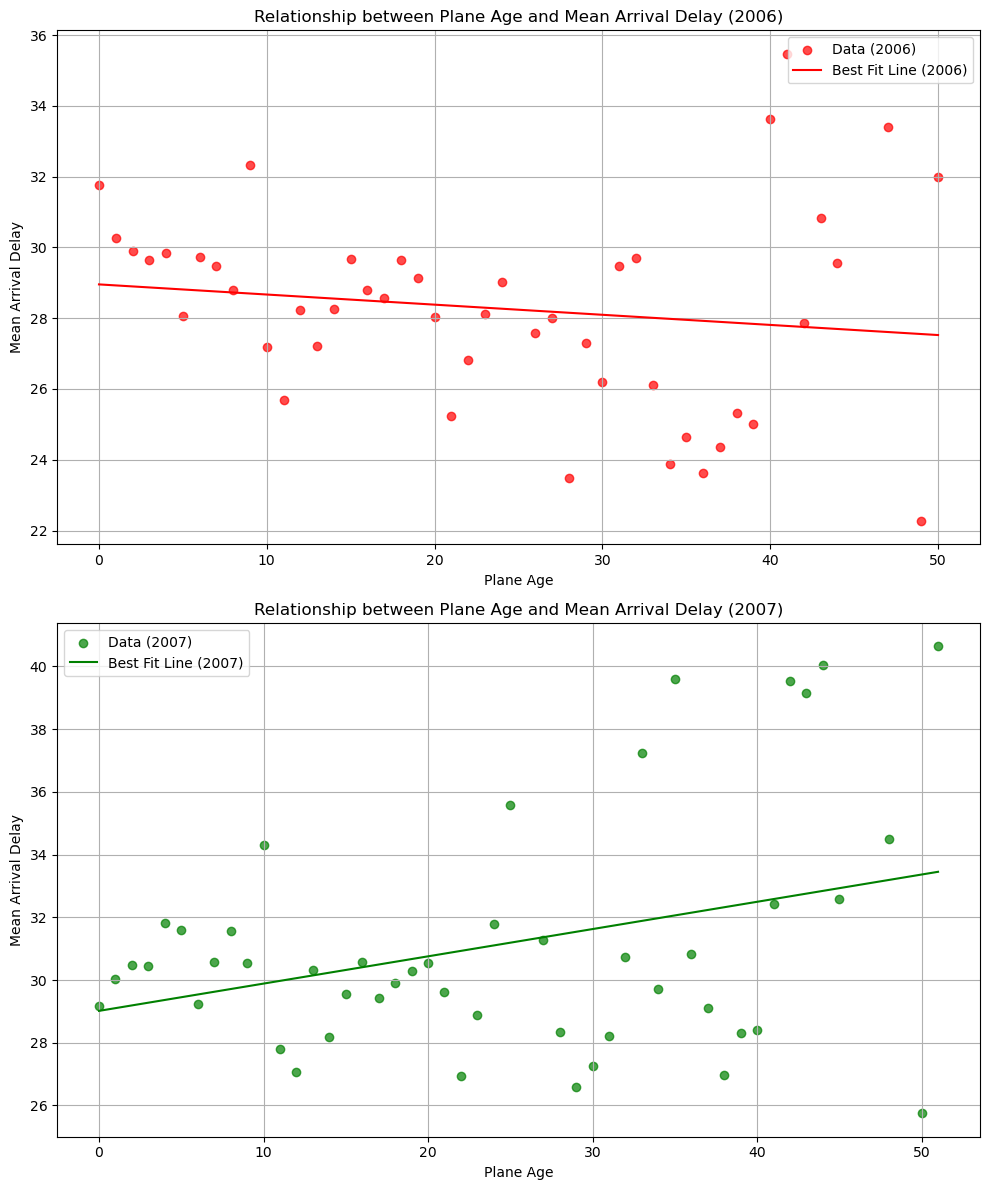

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
# for 2006
plt.sca(axes[0])
plt.scatter(yearly_arrival_data_2006.index, yearly_arrival_data_2006.values, color='red', alpha=0.7, label='Data (2006)')
coefficients_2006 = np.polyfit(yearly_arrival_data_2006.index, yearly_arrival_data_2006.values, 1)
best_fit_line_2006 = np.polyval(coefficients_2006, yearly_arrival_data_2006.index)
plt.plot(yearly_arrival_data_2006.index, best_fit_line_2006, color='red', linestyle='-', label='Best Fit Line (2006)')
plt.title('Relationship between Plane Age and Mean Arrival Delay (2006)')
plt.xlabel('Plane Age')
plt.ylabel('Mean Arrival Delay')
plt.grid(True)
plt.legend()
# for 2007
plt.sca(axes[1])
plt.scatter(yearly_arrival_data_2007.index, yearly_arrival_data_2007.values, color='green', alpha=0.7, label='Data (2007)')
coefficients_2007 = np.polyfit(yearly_arrival_data_2007.index, yearly_arrival_data_2007.values, 1)
best_fit_line_2007 = np.polyval(coefficients_2007, yearly_arrival_data_2007.index)
plt.plot(yearly_arrival_data_2007.index, best_fit_line_2007, color='green', linestyle='-', label='Best Fit Line (2007)')
plt.title('Relationship between Plane Age and Mean Arrival Delay (2007)')
plt.xlabel('Plane Age')
plt.ylabel('Mean Arrival Delay')
plt.grid(True)
plt.legend()
plt.tight_layout()  
plt.show()

In [71]:
# Calculate Pearson correlation coefficient and p-value for 2006
corr_2006, pval_2006 = pearsonr(yearly_arrival_data_2006.index, yearly_arrival_data_2006.values)

# Print the correlation coefficient for 2006
print('Correlation between Plane Age and Mean Arrival Delay (2006):', corr_2006)

# Calculate Pearson correlation coefficient and p-value for 2007
corr_2007, pval_2007 = pearsonr(yearly_arrival_data_2007.index, yearly_arrival_data_2007.values)

# Print the correlation coefficient for 2007
print('Correlation between Plane Age and Mean Arrival Delay (2007):', corr_2007)

Correlation between Plane Age and Mean Arrival Delay (2006): -0.14766160252866734
Correlation between Plane Age and Mean Arrival Delay (2007): 0.3415208513265151


In [72]:
# Convert 'ArrDelay' column to numeric, coerce errors to NaN
q2b_dep_dataset_cleaned['DepDelay'] = pd.to_numeric(q2b_dep_dataset_cleaned['DepDelay'], errors='coerce')

# Filter dataset for 2006
q2b_dep_dataset_2006 = q2b_dep_dataset_cleaned[q2b_dep_dataset_cleaned['Year'] == 2006]

# Calculate mean arrival delay for each plane age in 2006
yearly_departure_data_2006 = q2b_dep_dataset_2006.groupby("PlaneAge")["DepDelay"].mean()

# Filter dataset for 2007
q2b_dep_dataset_2007 = q2b_dep_dataset_cleaned[q2b_dep_dataset_cleaned['Year'] == 2007]

# Calculate mean arrival delay for each plane age in 2007
yearly_departure_data_2007 = q2b_dep_dataset_2007.groupby("PlaneAge")["DepDelay"].mean()

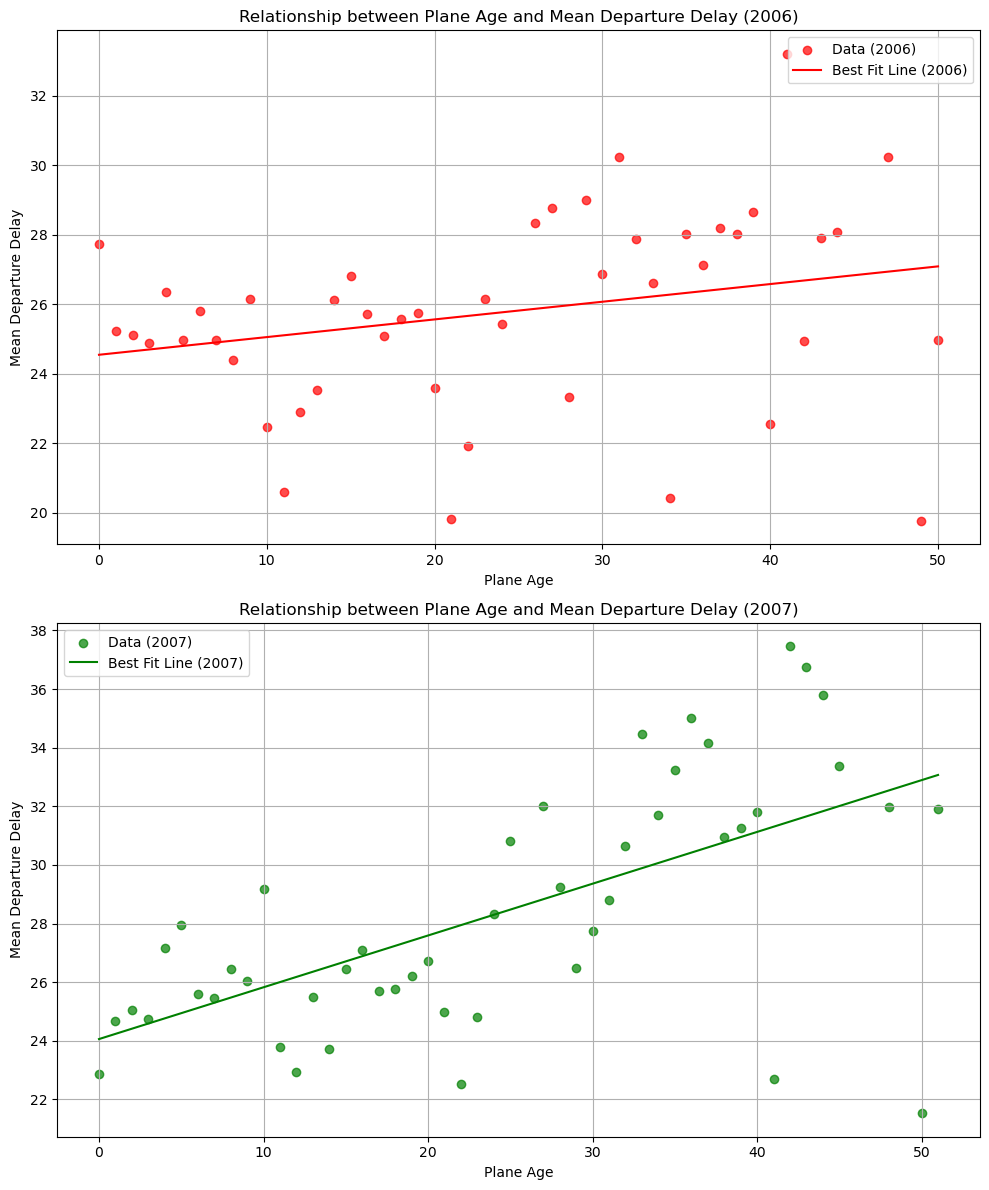

In [73]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot for 2006
plt.sca(axes[0])
plt.scatter(yearly_departure_data_2006.index, yearly_departure_data_2006.values, color='red', alpha=0.7, label='Data (2006)')
coefficients_2006 = np.polyfit(yearly_departure_data_2006.index, yearly_departure_data_2006.values, 1)
best_fit_line_2006 = np.polyval(coefficients_2006, yearly_departure_data_2006.index)
plt.plot(yearly_departure_data_2006.index, best_fit_line_2006, color='red', linestyle='-', label='Best Fit Line (2006)')
plt.title('Relationship between Plane Age and Mean Departure Delay (2006)')
plt.xlabel('Plane Age')
plt.ylabel('Mean Departure Delay')
plt.grid(True)
plt.legend()

# Plot for 2007
plt.sca(axes[1])
plt.scatter(yearly_departure_data_2007.index, yearly_departure_data_2007.values, color='green', alpha=0.7, label='Data (2007)')
coefficients_2007 = np.polyfit(yearly_departure_data_2007.index, yearly_departure_data_2007.values, 1)
best_fit_line_2007 = np.polyval(coefficients_2007, yearly_departure_data_2007.index)
plt.plot(yearly_departure_data_2007.index, best_fit_line_2007, color='green', linestyle='-', label='Best Fit Line (2007)')
plt.title('Relationship between Plane Age and Mean Departure Delay (2007)')
plt.xlabel('Plane Age')
plt.ylabel('Mean Departure Delay')
plt.grid(True)
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [74]:
# Calculate Pearson correlation coefficient and p-value for 2006
corr_2006, pval_2006 = pearsonr(yearly_departure_data_2006.index, yearly_departure_data_2006.values)

# Print the correlation coefficient for 2006
print('Correlation between Plane Age and Mean Departure Delay (2006):', corr_2006)

# Calculate Pearson correlation coefficient and p-value for 2007
corr_2007, pval_2007 = pearsonr(yearly_departure_data_2007.index, yearly_departure_data_2007.values)

# Print the correlation coefficient for 2007
print('Correlation between Plane Age and Mean Departure Delay (2007):', corr_2007)

Correlation between Plane Age and Mean Departure Delay (2006): 0.26142912910859045
Correlation between Plane Age and Mean Departure Delay (2007): 0.6289047086329791


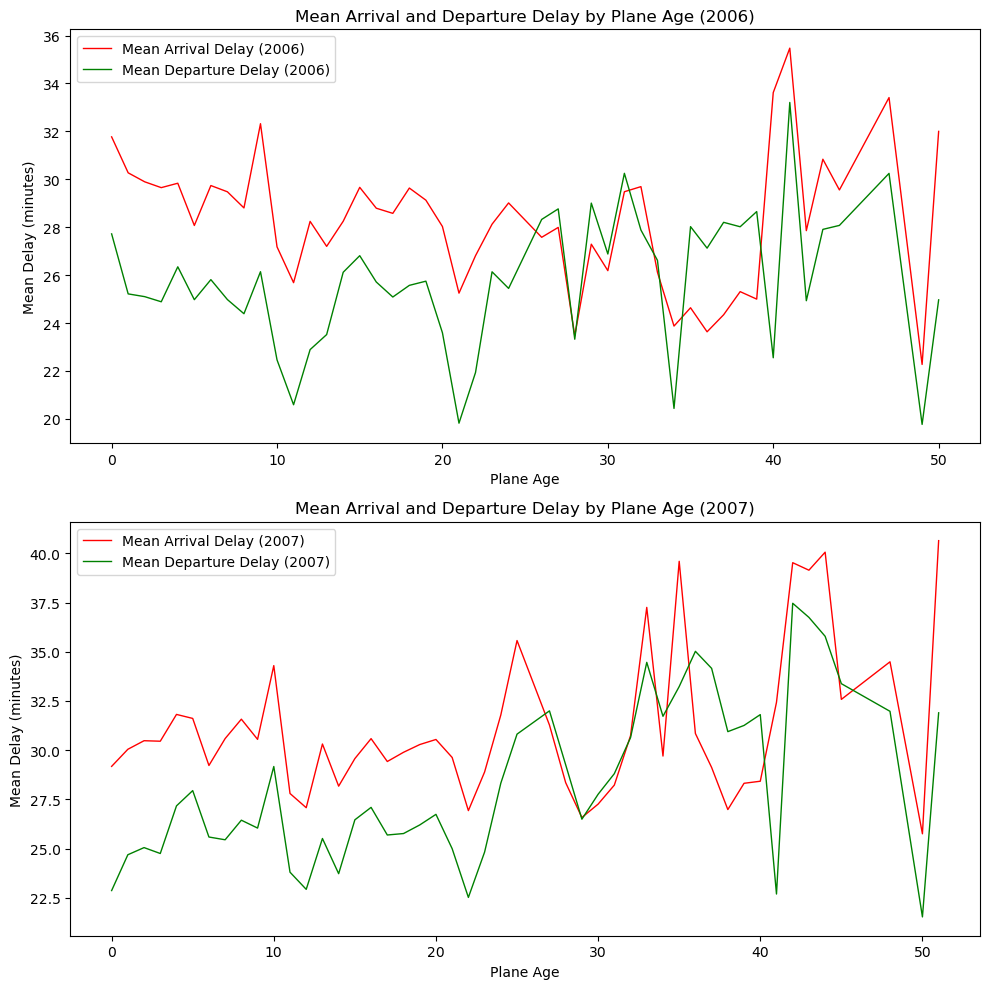

In [75]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot for 2006
plt.sca(axes[0])
plt.plot(yearly_arrival_data_2006.index, yearly_arrival_data_2006.values,  linestyle='-', color='red', label='Mean Arrival Delay (2006)', linewidth=1)
plt.plot(yearly_departure_data_2006.index, yearly_departure_data_2006.values, linestyle='-', color='green', label='Mean Departure Delay (2006)',linewidth=1)
plt.title('Mean Arrival and Departure Delay by Plane Age (2006)')
plt.xlabel('Plane Age')
plt.ylabel('Mean Delay (minutes)')
plt.legend()


# Plot for 2007
plt.sca(axes[1])
plt.plot(yearly_arrival_data_2007.index, yearly_arrival_data_2007.values, linestyle='-', color='red', label='Mean Arrival Delay (2007)',linewidth=1)
plt.plot(yearly_departure_data_2007.index, yearly_departure_data_2007.values, linestyle='-', color='green', label='Mean Departure Delay (2007)',linewidth=1)
plt.title('Mean Arrival and Departure Delay by Plane Age (2007)')
plt.xlabel('Plane Age')
plt.ylabel('Mean Delay (minutes)')
plt.legend()


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Questtion 2(b) - part B

#### we are checking whether old planes suffer more delays in terms of the five delay types 

In [76]:
q2b_dataset=pd.read_csv(r"C:\Users\user\Desktop\progdata\q2b_dataset.csv")
q2b_dataset.head()

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,N235SW,2006,0.0,10.0,13.0,0,0,0,0,0
1,N235SW,2007,0.0,-4.0,-6.0,0,0,0,0,0
2,N235SW,2007,0.0,-9.0,-7.0,0,0,0,0,0
3,N235SW,2007,0.0,-2.0,-3.0,0,0,0,0,0
4,N235SW,2007,0.0,27.0,33.0,0,0,0,0,27


In [77]:
pd.isnull(q2b_dataset).sum(axis=0)
#checking for null values

TailNum                   22
Year                       0
YearOfManufacture    2920615
ArrDelay              316046
DepDelay              282682
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [78]:
q2b_dataset['YearOfManufacture'] = q2b_dataset['YearOfManufacture'].replace(0.0, pd.NA)
# making rows with '0.0' values in "year of manufacture" column null values

In [79]:
# Drop rows where 'YearOfManufacture' is NaN
q2b_dataset = q2b_dataset.dropna(subset=['YearOfManufacture'])

In [80]:
pd.isnull(q2b_dataset).sum(axis=0)

TailNum                  0
Year                     0
YearOfManufacture        0
ArrDelay             97402
DepDelay             70336
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
dtype: int64

In [81]:
#Sort the q2dataset by YearOfManufacture in ascending order
q2b_dataset = q2b_dataset.sort_values("YearOfManufacture")
q2b_dataset

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
10431,N381AA,2007,1956.0,19.0,0.0,0,0,19,0,0
10812,N381AA,2006,1956.0,26.0,10.0,0,0,26,0,0
10811,N381AA,2006,1956.0,-6.0,-1.0,0,0,0,0,0
10810,N381AA,2006,1956.0,-5.0,-1.0,0,0,0,0,0
10809,N381AA,2006,1956.0,4.0,5.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11614842,N266JB,2007,2007.0,-13.0,-7.0,0,0,0,0,0
11614841,N267JB,2007,2007.0,32.0,25.0,0,0,7,0,25
11614840,N267JB,2007,2007.0,7.0,5.0,0,0,0,0,0
11614848,N267JB,2007,2007.0,3.0,-1.0,0,0,0,0,0


In [82]:
q2b_dataset['YearOfManufacture'] = q2b_dataset['YearOfManufacture'].astype(int)

# Now 'YearOfManufacture' will have the values without decimal places
q2b_dataset.head()

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
10431,N381AA,2007,1956,19.0,0.0,0,0,19,0,0
10812,N381AA,2006,1956,26.0,10.0,0,0,26,0,0
10811,N381AA,2006,1956,-6.0,-1.0,0,0,0,0,0
10810,N381AA,2006,1956,-5.0,-1.0,0,0,0,0,0
10809,N381AA,2006,1956,4.0,5.0,0,0,0,0,0


In [83]:
# Drop the 'ArrDelay' and 'DepDelay' columns
q2b_delaytypes_only = q2b_dataset.drop(columns=['ArrDelay', 'DepDelay'])
q2b_delaytypes_only

,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
10431,N381AA,2007,1956,0,0,19,0,0
10812,N381AA,2006,1956,0,0,26,0,0
10811,N381AA,2006,1956,0,0,0,0,0
10810,N381AA,2006,1956,0,0,0,0,0
10809,N381AA,2006,1956,0,0,0,0,0
...,...,...,...,...,...,...,...,...
11614842,N266JB,2007,2007,0,0,0,0,0
11614841,N267JB,2007,2007,0,0,7,0,25
11614840,N267JB,2007,2007,0,0,0,0,0
11614848,N267JB,2007,2007,0,0,0,0,0


In [84]:
pd.isnull(q2b_delaytypes_only).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [85]:
q2b_delaytypes_only.dtypes

TailNum              object
Year                  int64
YearOfManufacture     int32
CarrierDelay          int64
WeatherDelay          int64
NASDelay              int64
SecurityDelay         int64
LateAircraftDelay     int64
dtype: object

In [86]:
# Convert 'YearOfManufacture' column to integer
q2b_delaytypes_only['YearOfManufacture'] = q2b_delaytypes_only['YearOfManufacture'].astype(int)

# Calculate plane age
q2b_delaytypes_only['PlaneAge'] = q2b_delaytypes_only['Year'] - q2b_delaytypes_only['YearOfManufacture']

In [87]:
# Print the DataFrame with plane age column
q2b_delaytypes_only

,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
10431,N381AA,2007,1956,0,0,19,0,0,51
10812,N381AA,2006,1956,0,0,26,0,0,50
10811,N381AA,2006,1956,0,0,0,0,0,50
10810,N381AA,2006,1956,0,0,0,0,0,50
10809,N381AA,2006,1956,0,0,0,0,0,50
...,...,...,...,...,...,...,...,...,...
11614842,N266JB,2007,2007,0,0,0,0,0,0
11614841,N267JB,2007,2007,0,0,7,0,25,0
11614840,N267JB,2007,2007,0,0,0,0,0,0
11614848,N267JB,2007,2007,0,0,0,0,0,0


In [88]:
#making plane age = -1 a null value
# Replace -1 with NaN in the 'PlaneAge' column
q2b_delaytypes_only['PlaneAge'] = q2b_delaytypes_only['PlaneAge'].replace(-1, pd.NA)

# Drop rows where 'PlaneAge' is NaN
q2b_delaytypes_only = q2b_delaytypes_only.dropna(subset=['PlaneAge'])
q2b_delaytypes_only

,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
10431,N381AA,2007,1956,0,0,19,0,0,51
10812,N381AA,2006,1956,0,0,26,0,0,50
10811,N381AA,2006,1956,0,0,0,0,0,50
10810,N381AA,2006,1956,0,0,0,0,0,50
10809,N381AA,2006,1956,0,0,0,0,0,50
...,...,...,...,...,...,...,...,...,...
11614842,N266JB,2007,2007,0,0,0,0,0,0
11614841,N267JB,2007,2007,0,0,7,0,25,0
11614840,N267JB,2007,2007,0,0,0,0,0,0
11614848,N267JB,2007,2007,0,0,0,0,0,0


Now we assume that an old plane is when the plane age is more than 20 years (to make it more easier for us to analyse)

reference: "most airplanes are dismantled when they reach 18 years old" (https://www.oxfordsaudia.com/en/blog/retired-old-airplanes-what-happens-to-them/)
 

Also, the 2009 ASA Statistical Computing and Graphics Data Expo consists of datasets from 1987 to 2008, therefore, an old plane would be manufactured before year 1987.

In [89]:
# Create a new column based on 'PlaneAge'
q2b_delaytypes_only['PlaneAgeCondition'] = 'old'
q2b_delaytypes_only.loc[q2b_delaytypes_only['PlaneAge'] <= 20, 'PlaneAgeCondition'] = 'new'
q2b_delaytypes_only

C:\Users\user\AppData\Local\Temp\ipykernel_4020\1871494619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2b_delaytypes_only['PlaneAgeCondition'] = 'old'


,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge,PlaneAgeCondition
10431,N381AA,2007,1956,0,0,19,0,0,51,old
10812,N381AA,2006,1956,0,0,26,0,0,50,old
10811,N381AA,2006,1956,0,0,0,0,0,50,old
10810,N381AA,2006,1956,0,0,0,0,0,50,old
10809,N381AA,2006,1956,0,0,0,0,0,50,old
...,...,...,...,...,...,...,...,...,...,...
11614842,N266JB,2007,2007,0,0,0,0,0,0,new
11614841,N267JB,2007,2007,0,0,7,0,25,0,new
11614840,N267JB,2007,2007,0,0,0,0,0,0,new
11614848,N267JB,2007,2007,0,0,0,0,0,0,new


In [90]:
q2b_carrier_delay= q2b_delaytypes_only [["CarrierDelay","PlaneAge", "Year", "PlaneAgeCondition"]]
q2b_carrier_delay.head()

,CarrierDelay,PlaneAge,Year,PlaneAgeCondition
10431,0,51,2007,old
10812,0,50,2006,old
10811,0,50,2006,old
10810,0,50,2006,old
10809,0,50,2006,old


In [91]:
q2b_weather_delay= q2b_delaytypes_only [["WeatherDelay","PlaneAge", "Year", "PlaneAgeCondition"]]
q2b_weather_delay.head()

,WeatherDelay,PlaneAge,Year,PlaneAgeCondition
10431,0,51,2007,old
10812,0,50,2006,old
10811,0,50,2006,old
10810,0,50,2006,old
10809,0,50,2006,old


In [92]:
q2b_NAS_delay= q2b_delaytypes_only [["NASDelay","PlaneAge", "Year", "PlaneAgeCondition"]]
q2b_NAS_delay.head()

,NASDelay,PlaneAge,Year,PlaneAgeCondition
10431,19,51,2007,old
10812,26,50,2006,old
10811,0,50,2006,old
10810,0,50,2006,old
10809,0,50,2006,old


In [93]:
q2b_security_delay= q2b_delaytypes_only [["SecurityDelay","PlaneAge", "Year", "PlaneAgeCondition"]]
q2b_security_delay.head()

,SecurityDelay,PlaneAge,Year,PlaneAgeCondition
10431,0,51,2007,old
10812,0,50,2006,old
10811,0,50,2006,old
10810,0,50,2006,old
10809,0,50,2006,old


In [94]:
q2b_lateaircraft_delay= q2b_delaytypes_only [["LateAircraftDelay","PlaneAge", "Year", "PlaneAgeCondition"]]
q2b_lateaircraft_delay.head()

,LateAircraftDelay,PlaneAge,Year,PlaneAgeCondition
10431,0,51,2007,old
10812,0,50,2006,old
10811,0,50,2006,old
10810,0,50,2006,old
10809,0,50,2006,old


##### making delays less than 1 null value

In [95]:
q2b_carrier_delay['CarrierDelay'] =q2b_carrier_delay ['CarrierDelay'].mask(q2b_carrier_delay['CarrierDelay'] < 1, pd.NA)

C:\Users\user\AppData\Local\Temp\ipykernel_4020\1128453534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2b_carrier_delay['CarrierDelay'] =q2b_carrier_delay ['CarrierDelay'].mask(q2b_carrier_delay['CarrierDelay'] < 1, pd.NA)


In [96]:
q2b_weather_delay['WeatherDelay'] =q2b_weather_delay['WeatherDelay'].mask(q2b_weather_delay['WeatherDelay'] < 1, pd.NA)

C:\Users\user\AppData\Local\Temp\ipykernel_4020\606145650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2b_weather_delay['WeatherDelay'] =q2b_weather_delay['WeatherDelay'].mask(q2b_weather_delay['WeatherDelay'] < 1, pd.NA)


In [97]:
q2b_NAS_delay['NASDelay'] =q2b_NAS_delay ['NASDelay'].mask(q2b_NAS_delay['NASDelay'] < 1, pd.NA)

C:\Users\user\AppData\Local\Temp\ipykernel_4020\4106753337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2b_NAS_delay['NASDelay'] =q2b_NAS_delay ['NASDelay'].mask(q2b_NAS_delay['NASDelay'] < 1, pd.NA)


In [98]:
q2b_security_delay['SecurityDelay'] =q2b_security_delay['SecurityDelay'].mask(q2b_security_delay['SecurityDelay'] < 1, pd.NA)

C:\Users\user\AppData\Local\Temp\ipykernel_4020\681795518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2b_security_delay['SecurityDelay'] =q2b_security_delay['SecurityDelay'].mask(q2b_security_delay['SecurityDelay'] < 1, pd.NA)


In [99]:
q2b_lateaircraft_delay['LateAircraftDelay'] =q2b_lateaircraft_delay['LateAircraftDelay'].mask(q2b_lateaircraft_delay['LateAircraftDelay'] < 1, pd.NA)

C:\Users\user\AppData\Local\Temp\ipykernel_4020\2181318273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2b_lateaircraft_delay['LateAircraftDelay'] =q2b_lateaircraft_delay['LateAircraftDelay'].mask(q2b_lateaircraft_delay['LateAircraftDelay'] < 1, pd.NA)


In [100]:
#dropping null values
q2b_carrier_delay = q2b_carrier_delay.dropna()
q2b_carrier_delay

,CarrierDelay,PlaneAge,Year,PlaneAgeCondition
10813,89.0,51,2007,old
10788,14.0,51,2007,old
10792,30.0,51,2007,old
10781,8.0,51,2007,old
10816,20.0,50,2006,old
...,...,...,...,...
11614883,225.0,0,2007,new
11614894,5.0,0,2007,new
11614889,14.0,0,2007,new
11614834,10.0,0,2007,new


In [101]:
q2b_NAS_delay = q2b_NAS_delay.dropna()
q2b_NAS_delay

,NASDelay,PlaneAge,Year,PlaneAgeCondition
10431,19.0,51,2007,old
10812,26.0,50,2006,old
10807,16.0,50,2006,old
10798,42.0,51,2007,old
10797,52.0,50,2006,old
...,...,...,...,...
11614830,20.0,0,2007,new
11614839,35.0,0,2007,new
11614849,1.0,0,2007,new
11614846,23.0,0,2007,new


In [102]:
q2b_security_delay = q2b_security_delay.dropna()
q2b_security_delay

,SecurityDelay,PlaneAge,Year,PlaneAgeCondition
10457,78.0,50,2006,old
10594,72.0,50,2006,old
15957,12.0,48,2007,old
13318,7.0,47,2006,old
14440,28.0,47,2006,old
...,...,...,...,...
11614373,5.0,0,2007,new
11615457,18.0,0,2007,new
11614575,8.0,0,2007,new
11614582,7.0,0,2007,new


In [103]:
q2b_lateaircraft_delay = q2b_lateaircraft_delay.dropna()
q2b_lateaircraft_delay

,LateAircraftDelay,PlaneAge,Year,PlaneAgeCondition
10788,18.0,51,2007,old
10794,7.0,51,2007,old
10847,114.0,50,2006,old
10845,25.0,51,2007,old
10775,1.0,51,2007,old
...,...,...,...,...
11614834,90.0,0,2007,new
11614828,16.0,0,2007,new
11614859,199.0,0,2007,new
11614849,24.0,0,2007,new


In [104]:
q2b_weather_delay = q2b_weather_delay.dropna()
q2b_weather_delay

,WeatherDelay,PlaneAge,Year,PlaneAgeCondition
10787,8.0,51,2007,old
10792,29.0,51,2007,old
10847,53.0,50,2006,old
10839,12.0,51,2007,old
10837,20.0,51,2007,old
...,...,...,...,...
11614387,132.0,0,2007,new
11614476,2.0,0,2007,new
11614495,9.0,0,2007,new
11615043,15.0,0,2007,new


In [105]:
#rechecking for null values
pd.isnull(q2b_carrier_delay).sum(axis=0)

CarrierDelay         0
PlaneAge             0
Year                 0
PlaneAgeCondition    0
dtype: int64

In [106]:
pd.isnull(q2b_weather_delay).sum(axis=0)

WeatherDelay         0
PlaneAge             0
Year                 0
PlaneAgeCondition    0
dtype: int64

In [107]:
pd.isnull(q2b_NAS_delay).sum(axis=0)

NASDelay             0
PlaneAge             0
Year                 0
PlaneAgeCondition    0
dtype: int64

In [108]:
pd.isnull(q2b_security_delay).sum(axis=0)

SecurityDelay        0
PlaneAge             0
Year                 0
PlaneAgeCondition    0
dtype: int64

In [109]:
pd.isnull(q2b_lateaircraft_delay).sum(axis=0)

LateAircraftDelay    0
PlaneAge             0
Year                 0
PlaneAgeCondition    0
dtype: int64

In [110]:
q2b_carrier_delay_2006 = q2b_carrier_delay[q2b_carrier_delay['Year'] == 2006]
q2b_carrier_delay_2007 = q2b_carrier_delay[q2b_carrier_delay['Year'] == 2007]

In [111]:
q2b_weather_delay_2006 = q2b_weather_delay[q2b_weather_delay['Year'] == 2006]
q2b_weather_delay_2007 = q2b_weather_delay[q2b_weather_delay['Year'] == 2007]

In [112]:
q2b_NAS_delay_2006 = q2b_NAS_delay[q2b_NAS_delay['Year'] == 2006]
q2b_NAS_delay_2007 = q2b_NAS_delay[q2b_NAS_delay['Year'] == 2007]

In [113]:
q2b_security_delay_2006 = q2b_security_delay[q2b_security_delay['Year'] == 2006]
q2b_security_delay_2007 = q2b_security_delay[q2b_security_delay['Year'] == 2007]

In [114]:
q2b_lateaircraft_delay_2006 = q2b_lateaircraft_delay[q2b_lateaircraft_delay['Year'] == 2006]
q2b_lateaircraft_delay_2007 = q2b_lateaircraft_delay[q2b_lateaircraft_delay['Year'] == 2007]

##### Seperating by year

In [115]:
carrier_delay_2006=q2b_carrier_delay_2006["CarrierDelay"]
carrier_delay_2007=q2b_carrier_delay_2007["CarrierDelay"]

In [116]:
weather_delay_2006=q2b_weather_delay_2006["WeatherDelay"]
weather_delay_2007=q2b_weather_delay_2007["WeatherDelay"]

In [117]:
NAS_delay_2006=q2b_NAS_delay_2006["NASDelay"]
NAS_delay_2007=q2b_NAS_delay_2007["NASDelay"]

In [118]:
security_delay_2006=q2b_security_delay_2006["SecurityDelay"]
security_delay_2007=q2b_security_delay_2007["SecurityDelay"]

In [119]:
lateaircraft_delay_2006=q2b_lateaircraft_delay_2006["LateAircraftDelay"]
lateaircraft_delay_2007=q2b_lateaircraft_delay_2007["LateAircraftDelay"]

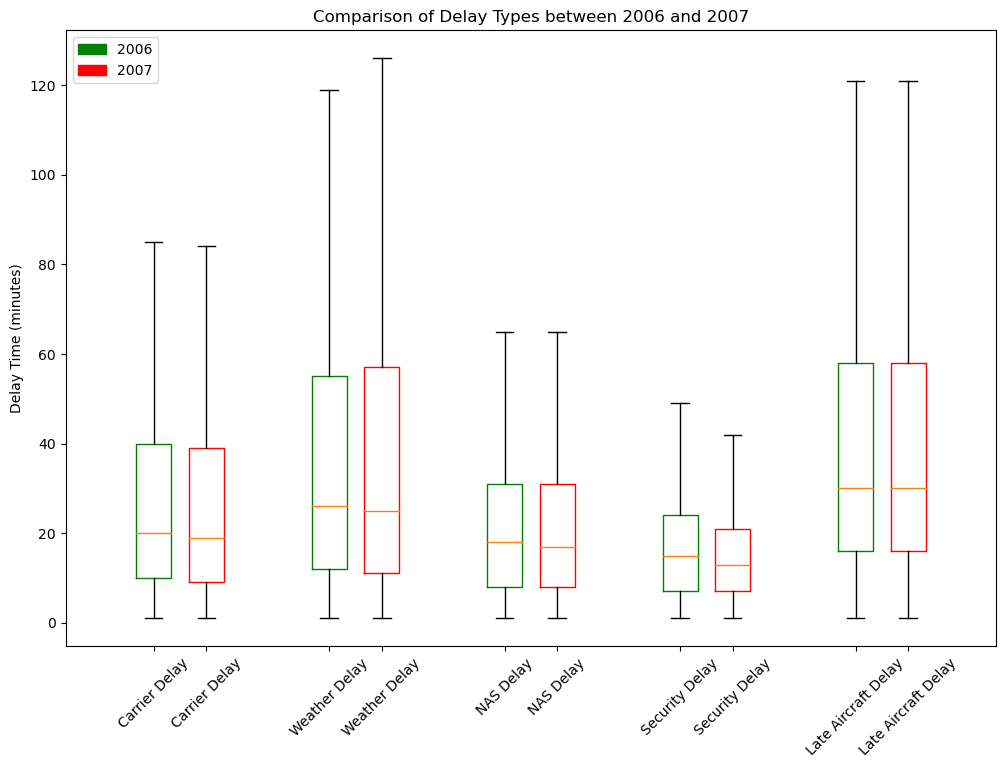

In [120]:
fig, ax = plt.subplots(figsize=(12, 8))

# Define positions for each boxplot
positions_2006 = [1, 2, 3, 4, 5]
positions_2007 = [1.3, 2.3, 3.3, 4.3, 5.3]

# Plot boxplots for 2006 data with different colors
ax.boxplot([carrier_delay_2006, weather_delay_2006, NAS_delay_2006, security_delay_2006, lateaircraft_delay_2006], positions=positions_2006, widths=0.2, showfliers=False, boxprops=dict(color="green"))

# Plot boxplots for 2007 data with different colors
ax.boxplot([carrier_delay_2007, weather_delay_2007, NAS_delay_2007, security_delay_2007, lateaircraft_delay_2007], positions=positions_2007, widths=0.2, showfliers=False, boxprops=dict(color="red"))

# Set x-axis labels and ticks
ax.set_xticks(positions_2006 + positions_2007)
ax.set_xticklabels(['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'] * 2, rotation=45)

# Set y-axis label
ax.set_ylabel('Delay Time (minutes)')

# Add legend
blue_patch = mpatches.Patch(color='green', label='2006')
red_patch = mpatches.Patch(color='red', label='2007')
ax.legend(handles=[blue_patch, red_patch])


plt.title('Comparison of Delay Types between 2006 and 2007')

plt.show()

##### calculating mean for each delay type for each plane age

In [121]:
carrier_delay_avg_2006 = q2b_carrier_delay_2006.groupby('PlaneAgeCondition')['CarrierDelay'].mean().reset_index()
carrier_delay_avg_2007 = q2b_carrier_delay_2007.groupby('PlaneAgeCondition')['CarrierDelay'].mean().reset_index()

In [122]:
weather_delay_avg_2006 = q2b_weather_delay_2006.groupby('PlaneAgeCondition')['WeatherDelay'].mean().reset_index()
weather_delay_avg_2007 = q2b_weather_delay_2007.groupby('PlaneAgeCondition')['WeatherDelay'].mean().reset_index()

In [123]:
NAS_delay_avg_2006 = q2b_NAS_delay_2006.groupby('PlaneAgeCondition')['NASDelay'].mean().reset_index()
NAS_delay_avg_2007 = q2b_NAS_delay_2007.groupby('PlaneAgeCondition')['NASDelay'].mean().reset_index()

In [124]:
security_delay_avg_2006 = q2b_security_delay_2006.groupby('PlaneAgeCondition')['SecurityDelay'].mean().reset_index()
security_delay_avg_2007 = q2b_security_delay_2007.groupby('PlaneAgeCondition')['SecurityDelay'].mean().reset_index()

In [125]:
lateaircraft_delay_avg_2006 = q2b_lateaircraft_delay_2006.groupby('PlaneAgeCondition')['LateAircraftDelay'].mean().reset_index()
lateaircraft_delay_avg_2007 = q2b_lateaircraft_delay_2007.groupby('PlaneAgeCondition')['LateAircraftDelay'].mean().reset_index()

In [126]:
#merging the mean for each delay types for seperate years

#### Year 2006

In [127]:
merged_delay_types_2006=pd.merge(carrier_delay_avg_2006, weather_delay_avg_2006, on='PlaneAgeCondition')
merged_delay_types_2006 =pd.merge(merged_delay_types_2006,NAS_delay_avg_2006, on='PlaneAgeCondition')
merged_delay_types_2006=pd.merge(merged_delay_types_2006,security_delay_avg_2006, on='PlaneAgeCondition')
merged_delay_types_2006=pd.merge(merged_delay_types_2006,lateaircraft_delay_avg_2006, on='PlaneAgeCondition')
merged_delay_types_2006

,PlaneAgeCondition,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,new,35.361699,44.162562,28.365644,22.005500,45.910393
1,old,32.908169,34.855780,22.196846,18.201172,36.370866


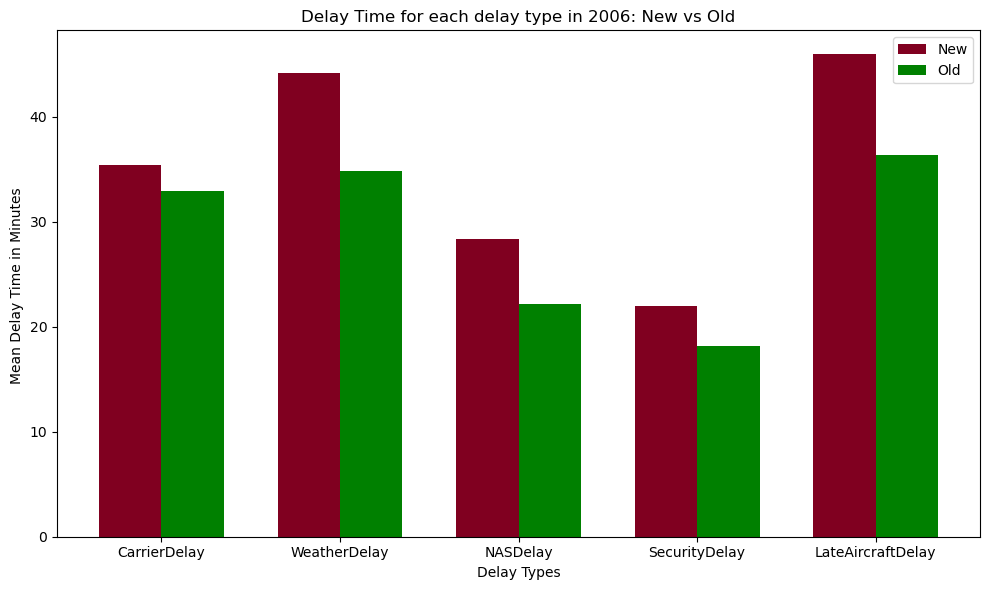

In [128]:
# Sample data
merged_delay_types_2006 = {
    'PlaneAgeCondition': ['new', 'old'],
    'CarrierDelay': [35.361699, 32.908169],
    'WeatherDelay': [44.162562, 34.855780],
    'NASDelay': [28.365644, 22.196846],
    'SecurityDelay': [22.005500, 18.201172],
    'LateAircraftDelay': [45.910393, 36.370866]
}

# Extracting delay types
delay_types = list(merged_delay_types_2006.keys())[1:]

# Extracting delay values for each PlaneAgeCondition
new_values = [merged_delay_types_2006[delay_type][0] for delay_type in delay_types]
old_values = [merged_delay_types_2006[delay_type][1] for delay_type in delay_types]

# Colors for bars
colors = ['#800020', 'green']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(delay_types))
plt.bar(index, new_values, bar_width, label='New', color=colors[0])
plt.bar([i + bar_width for i in index], old_values, bar_width, label='Old', color=colors[1])

plt.xlabel('Delay Types')
plt.ylabel('Mean Delay Time in Minutes ')
plt.title('Delay Time for each delay type in 2006: New vs Old')
plt.xticks([i + bar_width / 2 for i in index], delay_types)
plt.legend()

plt.tight_layout()
plt.show()

#### Year 2007

In [129]:
merged_delay_types_2007=pd.merge(carrier_delay_avg_2007, weather_delay_avg_2007, on='PlaneAgeCondition')
merged_delay_types_2007=pd.merge(merged_delay_types_2007,NAS_delay_avg_2007, on='PlaneAgeCondition')
merged_delay_types_2007=pd.merge(merged_delay_types_2007,security_delay_avg_2007, on='PlaneAgeCondition')
merged_delay_types_2007=pd.merge(merged_delay_types_2007,lateaircraft_delay_avg_2007, on='PlaneAgeCondition')
merged_delay_types_2007

,PlaneAgeCondition,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,new,34.471716,46.101770,27.781552,19.254715,45.68296
1,old,32.563655,36.299952,23.473702,15.483516,39.89857


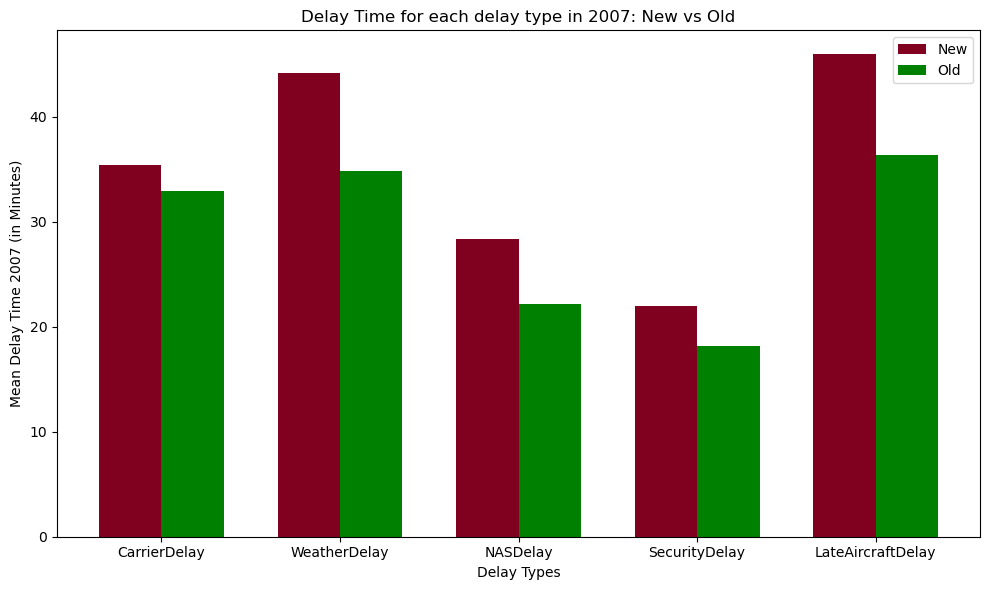

In [130]:
# Sample data
merged_delay_types_2007 = {
    'PlaneAgeCondition': ['new', 'old'],
    'CarrierDelay': [35.361699, 32.908169],
    'WeatherDelay': [44.162562, 34.855780],
    'NASDelay': [28.365644, 22.196846],
    'SecurityDelay': [22.005500, 18.201172],
    'LateAircraftDelay': [45.910393, 36.370866]
}

# Extracting delay types
delay_types = list(merged_delay_types_2006.keys())[1:]

# Extracting delay values for each PlaneAgeCondition
new_values = [merged_delay_types_2007[delay_type][0] for delay_type in delay_types]
old_values = [merged_delay_types_2007[delay_type][1] for delay_type in delay_types]

# Colors for bars
colors = ['#800020', 'green']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(delay_types))
plt.bar(index, new_values, bar_width, label='New', color=colors[0])
plt.bar([i + bar_width for i in index], old_values, bar_width, label='Old', color=colors[1])

plt.xlabel('Delay Types')
plt.ylabel('Mean Delay Time 2007 (in Minutes)')
plt.title('Delay Time for each delay type in 2007: New vs Old')
plt.xticks([i + bar_width / 2 for i in index], delay_types)
plt.legend()

plt.tight_layout()
plt.show()

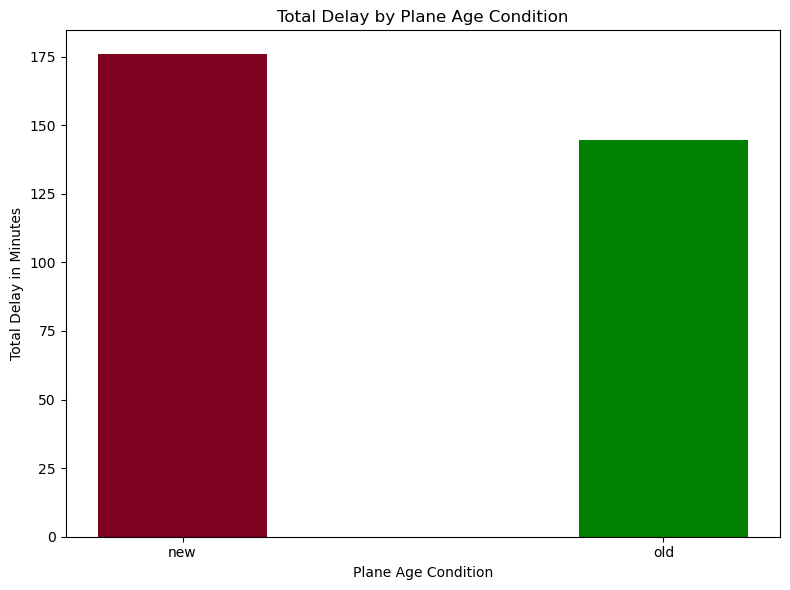

In [131]:
# Sample data
merged_delay_types_2006 = {
    'PlaneAgeCondition': ['new', 'old'],
    'CarrierDelay': [35.361699, 32.908169],
    'WeatherDelay': [44.162562, 34.855780],
    'NASDelay': [28.365644, 22.196846],
    'SecurityDelay': [22.005500, 18.201172],
    'LateAircraftDelay': [45.910393, 36.370866]
}

# Extracting PlaneAgeCondition
plane_age_condition = merged_delay_types_2006['PlaneAgeCondition']

# Summing up delay values for each PlaneAgeCondition
new_sum = sum(merged_delay_types_2006[delay_type][0] for delay_type in merged_delay_types_2006.keys() if delay_type != 'PlaneAgeCondition')
old_sum = sum(merged_delay_types_2006[delay_type][1] for delay_type in merged_delay_types_2006.keys() if delay_type != 'PlaneAgeCondition')

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(2)
plt.bar(index, [new_sum, old_sum], bar_width, color=['#800020', 'green'])

plt.xlabel('Plane Age Condition')
plt.ylabel('Total Delay in Minutes')
plt.title('Total Delay by Plane Age Condition')
plt.xticks(index, plane_age_condition)

plt.tight_layout()
plt.show()

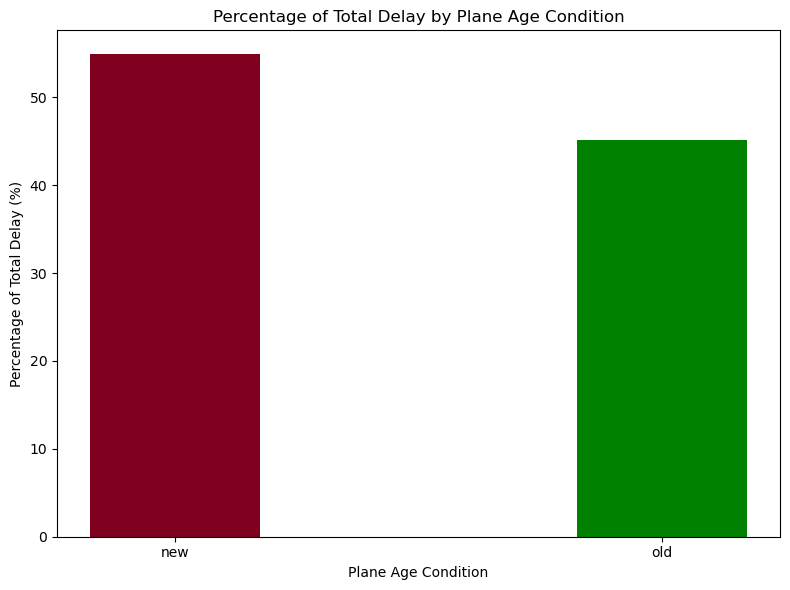

In [132]:
# Sample data
merged_delay_types_2006 = {
    'PlaneAgeCondition': ['new', 'old'],
    'CarrierDelay': [35.361699, 32.908169],
    'WeatherDelay': [44.162562, 34.855780],
    'NASDelay': [28.365644, 22.196846],
    'SecurityDelay': [22.005500, 18.201172],
    'LateAircraftDelay': [45.910393, 36.370866]
}

# Extracting PlaneAgeCondition
plane_age_condition = merged_delay_types_2006['PlaneAgeCondition']

# Summing up delay values for each PlaneAgeCondition
new_sum = sum(merged_delay_types_2006[delay_type][0] for delay_type in merged_delay_types_2006.keys() if delay_type != 'PlaneAgeCondition')
old_sum = sum(merged_delay_types_2006[delay_type][1] for delay_type in merged_delay_types_2006.keys() if delay_type != 'PlaneAgeCondition')

# Calculating percentages
total_sum = new_sum + old_sum
new_percentage = (new_sum / total_sum) * 100
old_percentage = (old_sum / total_sum) * 100

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(2)
plt.bar(index, [new_percentage, old_percentage], bar_width, color=['#800020', 'green'])

plt.xlabel('Plane Age Condition')
plt.ylabel('Percentage of Total Delay (%)')
plt.title('Percentage of Total Delay by Plane Age Condition')
plt.xticks(index, plane_age_condition)

plt.tight_layout()
plt.show()